In [172]:
#Import Librarairs
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [173]:
#Read the data from source
loan = pd.read_csv(r'D:\NTUC Hub Learning\Project Capstone\Assessment\Project 1 - Finance - Predictive Analytics\Project 1 - Finance - Predictive Analytics\Dataset\loan.csv')

In [174]:
#To check the file distribution data size in columns and rows  
rows,columns = loan.shape
print ('Rows', rows)
print ('Columns', columns)

Rows 5000
Columns 17


In [175]:
#Look into the data
loan

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST-00002992,LN00001103,Car Loan,37945,0.070087,57,Self-employed,High,511,Male,Married,PhD,23-01-2022,11-02-2022,14-02-2022,13-06-2022,False
4996,CUST-00004094,LN00001068,Personal Loan,48937,0.056405,50,Part-time,Medium,502,Male,Single,PhD,12-05-2018,17-05-2018,27-05-2018,20-11-2018,False
4997,CUST-00003903,LN00000745,Home Loan,7476,0.064212,58,Full-time,High,452,Female,Single,High School,14-10-2022,29-10-2022,06-11-2022,08-04-2023,True
4998,CUST-00002276,LN00003075,Car Loan,52756,0.094914,12,Self-employed,Medium,728,Male,Married,PhD,21-07-2018,06-08-2018,20-08-2018,21-01-2019,False


In [176]:
#Check for any missing data
loan.isnull().sum()

customer_id          0
loan_id              0
loan_type            0
loan_amount          0
interest_rate        0
loan_term            0
employment_type      0
income_level         0
credit_score         0
gender               0
marital_status       0
education_level      0
application_date     0
approval_date        0
disbursement_date    0
due_date             0
default_status       0
dtype: int64

In [177]:
#To check data types of each column
loan.dtypes

customer_id           object
loan_id               object
loan_type             object
loan_amount            int64
interest_rate        float64
loan_term              int64
employment_type       object
income_level          object
credit_score           int64
gender                object
marital_status        object
education_level       object
application_date      object
approval_date         object
disbursement_date     object
due_date              object
default_status          bool
dtype: object

In [178]:
#To replace the default status column in boolean to integer in order to calculate the default status in numbers #####
#To covert interest rate from decimal to percentage type and round off to 3 decimal places (for categorization in groups before encoding during data binning phase )

loan['default_status']= loan['default_status'].replace({True: 1, False: 0})

loan['interest_rate']= loan['interest_rate'].multiply(100)

loan['interest_rate']= loan['interest_rate'].round(1)

In [179]:
#To change all the column with dates to datetime format

loan[['application_date', 'approval_date', 'disbursement_date', 'due_date']] = loan[['application_date', 'approval_date', 'disbursement_date', 'due_date']].apply(pd.to_datetime)


In [180]:
loan

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,5.2,15,Self-employed,Medium,833,Male,Single,Master,2018-05-04,2018-04-23,2018-04-24,2018-08-14,0
1,CUST-00004194,LN00002413,Personal Loan,1860,8.9,56,Full-time,Medium,776,Female,Married,Bachelor,2022-12-30,2022-12-31,2023-12-01,2023-05-04,0
2,CUST-00003610,LN00000024,Personal Loan,77820,7.0,51,Full-time,Low,697,Male,Divorced,High School,2019-11-15,2019-11-18,2019-11-27,2020-02-24,0
3,CUST-00001895,LN00001742,Car Loan,55886,6.2,30,Full-time,Low,795,Female,Married,PhD,2021-08-25,2021-08-09,2021-11-09,2022-02-25,0
4,CUST-00003782,LN00003161,Home Loan,7265,7.1,48,Part-time,Low,519,Female,Married,High School,2020-02-09,2020-07-09,2020-11-09,2020-12-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST-00002992,LN00001103,Car Loan,37945,7.0,57,Self-employed,High,511,Male,Married,PhD,2022-01-23,2022-11-02,2022-02-14,2022-06-13,0
4996,CUST-00004094,LN00001068,Personal Loan,48937,5.6,50,Part-time,Medium,502,Male,Single,PhD,2018-12-05,2018-05-17,2018-05-27,2018-11-20,0
4997,CUST-00003903,LN00000745,Home Loan,7476,6.4,58,Full-time,High,452,Female,Single,High School,2022-10-14,2022-10-29,2022-06-11,2023-08-04,1
4998,CUST-00002276,LN00003075,Car Loan,52756,9.5,12,Self-employed,Medium,728,Male,Married,PhD,2018-07-21,2018-06-08,2018-08-20,2019-01-21,0


In [181]:
#To check the data types again, half of data are caterorical,interest rate in decimmal
#Loan amount, loan term and credit score in integer, all dates are in date format now
#Default status in boolean output format 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        5000 non-null   object        
 1   loan_id            5000 non-null   object        
 2   loan_type          5000 non-null   object        
 3   loan_amount        5000 non-null   int64         
 4   interest_rate      5000 non-null   float64       
 5   loan_term          5000 non-null   int64         
 6   employment_type    5000 non-null   object        
 7   income_level       5000 non-null   object        
 8   credit_score       5000 non-null   int64         
 9   gender             5000 non-null   object        
 10  marital_status     5000 non-null   object        
 11  education_level    5000 non-null   object        
 12  application_date   5000 non-null   datetime64[ns]
 13  approval_date      5000 non-null   datetime64[ns]
 14  disburse

In [182]:
#Although all the dates are in datetime64 format for Pandas datatypes from object now, we need to convert it into integers for the ML algorthims to have a predictive accuracy.
#Break apart the date and get the year, month, week of year, day of month

loan['application_date_year'] = loan['application_date'].dt.year
loan['application_date_month'] = loan['application_date'].dt.month
loan['application_date_week'] = loan['application_date'].dt.week
loan['application_date_day'] = loan['application_date'].dt.day
loan['application_date_dayofweek'] = loan['application_date'].dt.dayofweek

loan['approval_date_year'] = loan['approval_date'].dt.year
loan['approval_date_month'] = loan['approval_date'].dt.month
loan['approval_date_week'] = loan['approval_date'].dt.week
loan['approval_date_day'] = loan['approval_date'].dt.day
loan['approval_date_dayofweek'] = loan['approval_date'].dt.dayofweek

loan['disbursement_date_year'] = loan['disbursement_date'].dt.year
loan['disbursement_date_month'] = loan['disbursement_date'].dt.month
loan['disbursement_date_week'] = loan['disbursement_date'].dt.week
loan['disbursement_date_day'] = loan['disbursement_date'].dt.day
loan['disbursement_date_dayofweek'] = loan['disbursement_date'].dt.dayofweek

loan['due_date_year'] = loan['due_date'].dt.year
loan['due_date_month'] = loan['due_date'].dt.month
loan['due_date_week'] = loan['due_date'].dt.week
loan['due_date_day'] = loan['due_date'].dt.day
loan['due_date_dayofweek'] = loan['due_date'].dt.dayofweek

In [183]:
#To verify if the conversion dates works: 

loan[['application_date_year', 'application_date_month', 'application_date_week', 'application_date_day', 'application_date_dayofweek']].head()

,application_date_year,application_date_month,application_date_week,application_date_day,application_date_dayofweek
0,2018,5,18,4,4
1,2022,12,52,30,4
2,2019,11,46,15,4
3,2021,8,34,25,2
4,2020,2,6,9,6


In [184]:
#To further explore by grouping all the same value for the approval date
#By year

loan.groupby ('approval_date_year').size()

approval_date_year
2018     983
2019     978
2020    1006
2021    1029
2022     966
2023      38
dtype: int64

In [185]:
#By month of year

loan.groupby ('approval_date_month').size()

approval_date_month
1     439
2     362
3     431
4     393
5     430
6     433
7     413
8     424
9     424
10    392
11    428
12    431
dtype: int64

In [186]:
#By day of week

loan.groupby ('approval_date_dayofweek').size()

approval_date_dayofweek
0    728
1    725
2    716
3    725
4    678
5    741
6    687
dtype: int64

In [187]:
#To check if all the breakdown dates is in integer data type

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   customer_id                  5000 non-null   object        
 1   loan_id                      5000 non-null   object        
 2   loan_type                    5000 non-null   object        
 3   loan_amount                  5000 non-null   int64         
 4   interest_rate                5000 non-null   float64       
 5   loan_term                    5000 non-null   int64         
 6   employment_type              5000 non-null   object        
 7   income_level                 5000 non-null   object        
 8   credit_score                 5000 non-null   int64         
 9   gender                       5000 non-null   object        
 10  marital_status               5000 non-null   object        
 11  education_level              5000 non-null 

In [188]:
#To analyse the catergorical variables- Default Status

loan.default_status.value_counts() # The number of defaulters are much lower (4 times) than the non-defaulters

0    4001
1     999
Name: default_status, dtype: int64

In [189]:
#To analyse the catergorical variables- Loan Type

loan.loan_type.value_counts() # The distribution of loan type is balanced

Personal Loan     1281
Car Loan          1273
Home Loan         1264
Education Loan    1182
Name: loan_type, dtype: int64

In [190]:
#To analyse the catergorical variables- Employment Type

loan.employment_type.value_counts() # The distribution of Employment type is balanced

Part-time        1672
Self-employed    1669
Full-time        1659
Name: employment_type, dtype: int64

In [191]:
#To analyse the catergorical variables- Income Level

loan.income_level.value_counts() # Below shows the low income level has a higher distribution number than the other two

Low       1713
Medium    1672
High      1615
Name: income_level, dtype: int64

In [192]:
#To analyse the catergorical variables- Gender

loan.gender.value_counts() # The Male gender has a higher distribution number than the Female

Male      2542
Female    2458
Name: gender, dtype: int64

In [193]:
#To analyse the catergorical variables- Marital Status

loan.marital_status.value_counts() # The Divorced and Married status has a higher distribution number than the Single status

Divorced    1682
Married     1681
Single      1637
Name: marital_status, dtype: int64

In [194]:
#To analyse the catergorical variables- Education Level

loan.education_level.value_counts() # The PhD has a higher distribution number than the other level

PhD            1282
Master         1254
Bachelor       1254
High School    1210
Name: education_level, dtype: int64

In [195]:
#To check the numerical values in columns 

loan.describe()

,loan_amount,interest_rate,loan_term,credit_score,default_status,application_date_year,application_date_month,application_date_week,application_date_day,application_date_dayofweek,...,disbursement_date_year,disbursement_date_month,disbursement_date_week,disbursement_date_day,disbursement_date_dayofweek,due_date_year,due_date_month,due_date_week,due_date_day,due_date_dayofweek
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,7.957480,35.263000,573.206000,0.19980,2019.988600,6.521200,26.549400,15.755400,3.005200,...,2020.047800,6.451600,26.28480,15.83780,3.000200,2020.324800,6.541200,26.643800,15.760600,3.004200
std,28721.249529,1.523036,13.792501,158.647522,0.39989,1.408569,3.447249,15.048563,8.818907,2.013153,...,1.429799,3.457926,15.12129,8.83857,2.034657,1.485175,3.428389,14.972193,8.724455,2.002345
min,1055.000000,3.200000,12.000000,300.000000,0.00000,2018.000000,1.000000,1.000000,1.000000,0.000000,...,2018.000000,1.000000,1.00000,1.00000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000
25%,24953.500000,6.900000,24.000000,435.000000,0.00000,2019.000000,4.000000,14.000000,8.000000,1.000000,...,2019.000000,3.000000,13.00000,8.00000,1.000000,2019.000000,4.000000,14.000000,8.000000,1.000000
50%,49730.000000,8.000000,35.000000,571.000000,0.00000,2020.000000,6.000000,26.000000,16.000000,3.000000,...,2020.000000,6.000000,26.00000,16.00000,3.000000,2020.000000,7.000000,26.000000,16.000000,3.000000
75%,75083.500000,9.000000,47.000000,712.000000,0.00000,2021.000000,10.000000,40.000000,23.000000,5.000000,...,2021.000000,9.000000,39.00000,23.25000,5.000000,2022.000000,10.000000,40.000000,23.000000,5.000000
max,99989.000000,13.900000,59.000000,849.000000,1.00000,2023.000000,12.000000,53.000000,31.000000,6.000000,...,2023.000000,12.000000,53.00000,31.00000,6.000000,2023.000000,12.000000,53.000000,31.000000,6.000000


In [118]:
#To check the skewness of each Numerical variable :
# Loan Amount

skewLoanAmount = loan.loan_amount.skew(axis = 0, skipna = True)
print('Loan Amount skewness: ', skewLoanAmount)

Loan Amount skewness:  0.022557766982177468


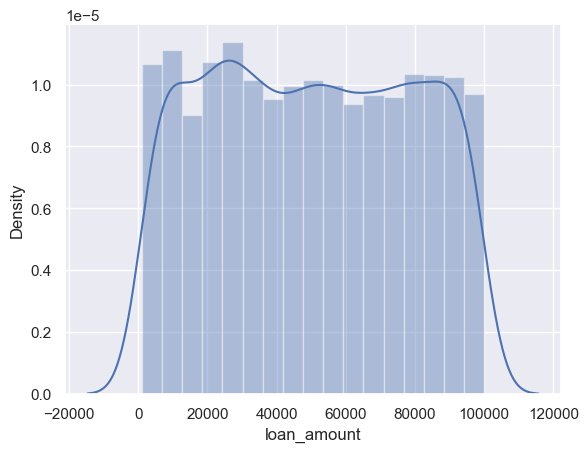

In [119]:
sns.distplot(loan['loan_amount']); #The distribution of 'Loan Amount' column is symetric, since the skewness value between -0.5 and 0.5

In [120]:
#Interest Rate

skewInterestRate = loan.interest_rate.skew(axis = 0, skipna = True)
print('Interest Rate skewness: ', skewInterestRate)

Interest Rate skewness:  0.010015295077906989


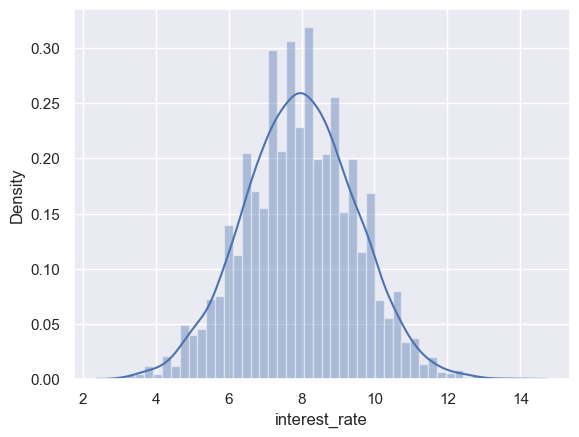

In [121]:
sns.distplot(loan['interest_rate']); #The distribution of 'Interest Rate' column is symetric, since the skewness value between -0.5 and 0.5

In [122]:
#Loan Term

skewLoanTerm = loan.loan_term.skew(axis = 0, skipna = True)
print('Loan Term skewness: ', skewLoanTerm)

Loan Term skewness:  0.031273752868043604


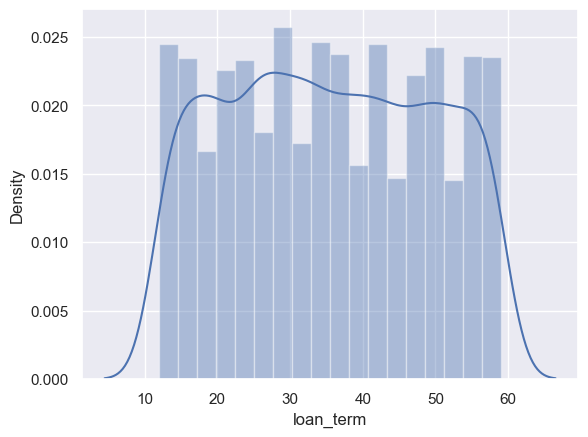

In [123]:
sns.distplot(loan['loan_term']); #The distribution of 'Loan Term' column is symetric, since the skewness value between -0.5 and 0.5

In [124]:
#Credit Score

skewCreditScore = loan.credit_score.skew(axis = 0, skipna = True)
print('Credit Score skewness: ', skewCreditScore)

Credit Score skewness:  0.010039817997711456


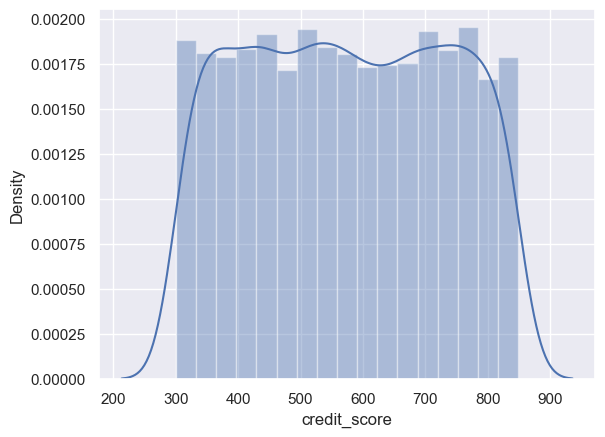

In [125]:
sns.distplot(loan['credit_score']); #The distribution of 'Credit Score' column is symetric, since the skewness value between -0.5 and 0.5

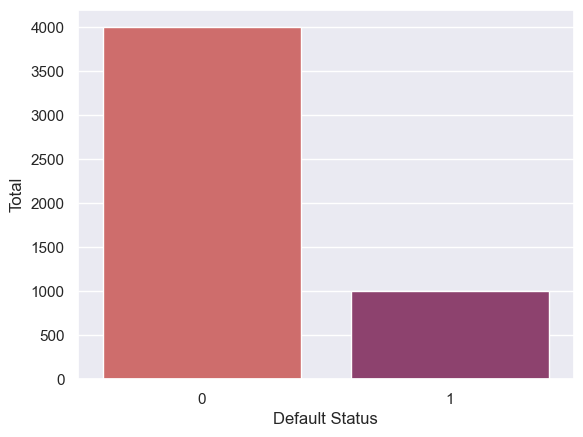

In [196]:
#EDA - Explore variables in the dataset using different various plots/charts:
#Default Status Distribution

sns.set_theme(style="darkgrid")
sns.countplot(x="default_status", data=loan, palette="flare")
plt.xlabel('Default Status')
plt.ylabel('Total')
plt.show()

<Axes: xlabel='marital_status', ylabel='count'>

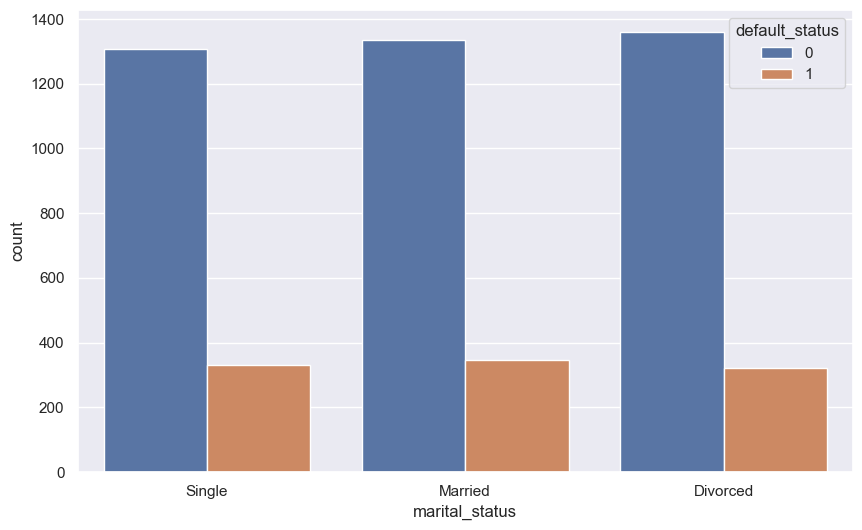

In [205]:
plt.figure(figsize=(10, 6))
sns.countplot( x='marital_status', hue='default_status', data=loan )

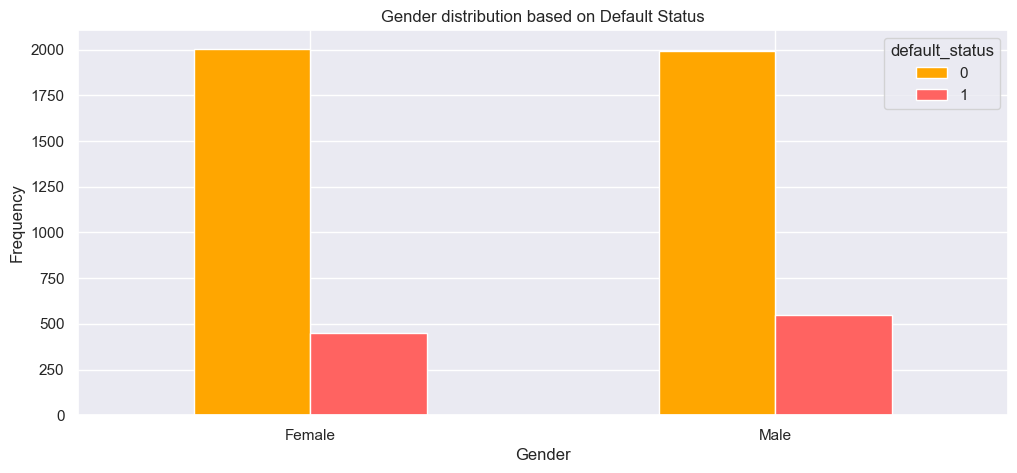

In [38]:
#Gender Distribution based on Default Status

pd.crosstab(loan.gender,loan.default_status).plot(kind="bar",figsize=(12,5),color=['#ffa600','#ff6361'])
plt.title('Gender distribution based on Default Status')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

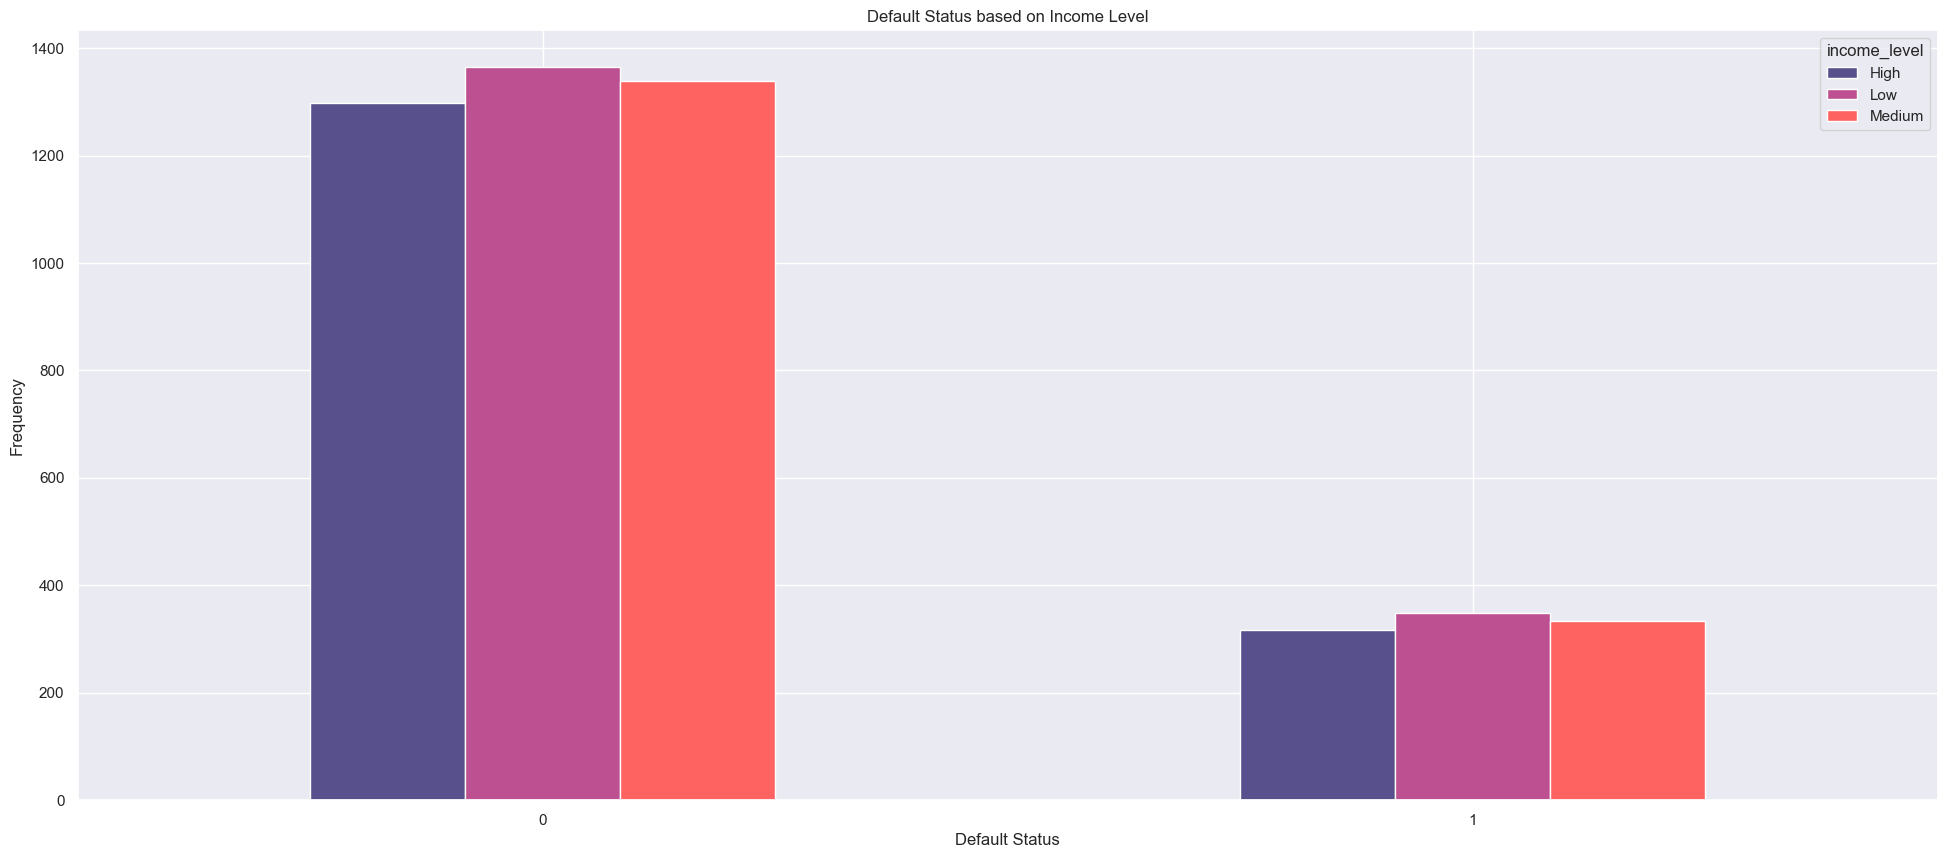

In [203]:
#Default Status based on Income Level

pd.crosstab(loan.default_status,loan.income_level).plot(kind="bar",figsize=(24,10),color=['#58508d','#bc5090','#ff6361'])
plt.title('Default Status based on Income Level')
plt.xlabel('Default Status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

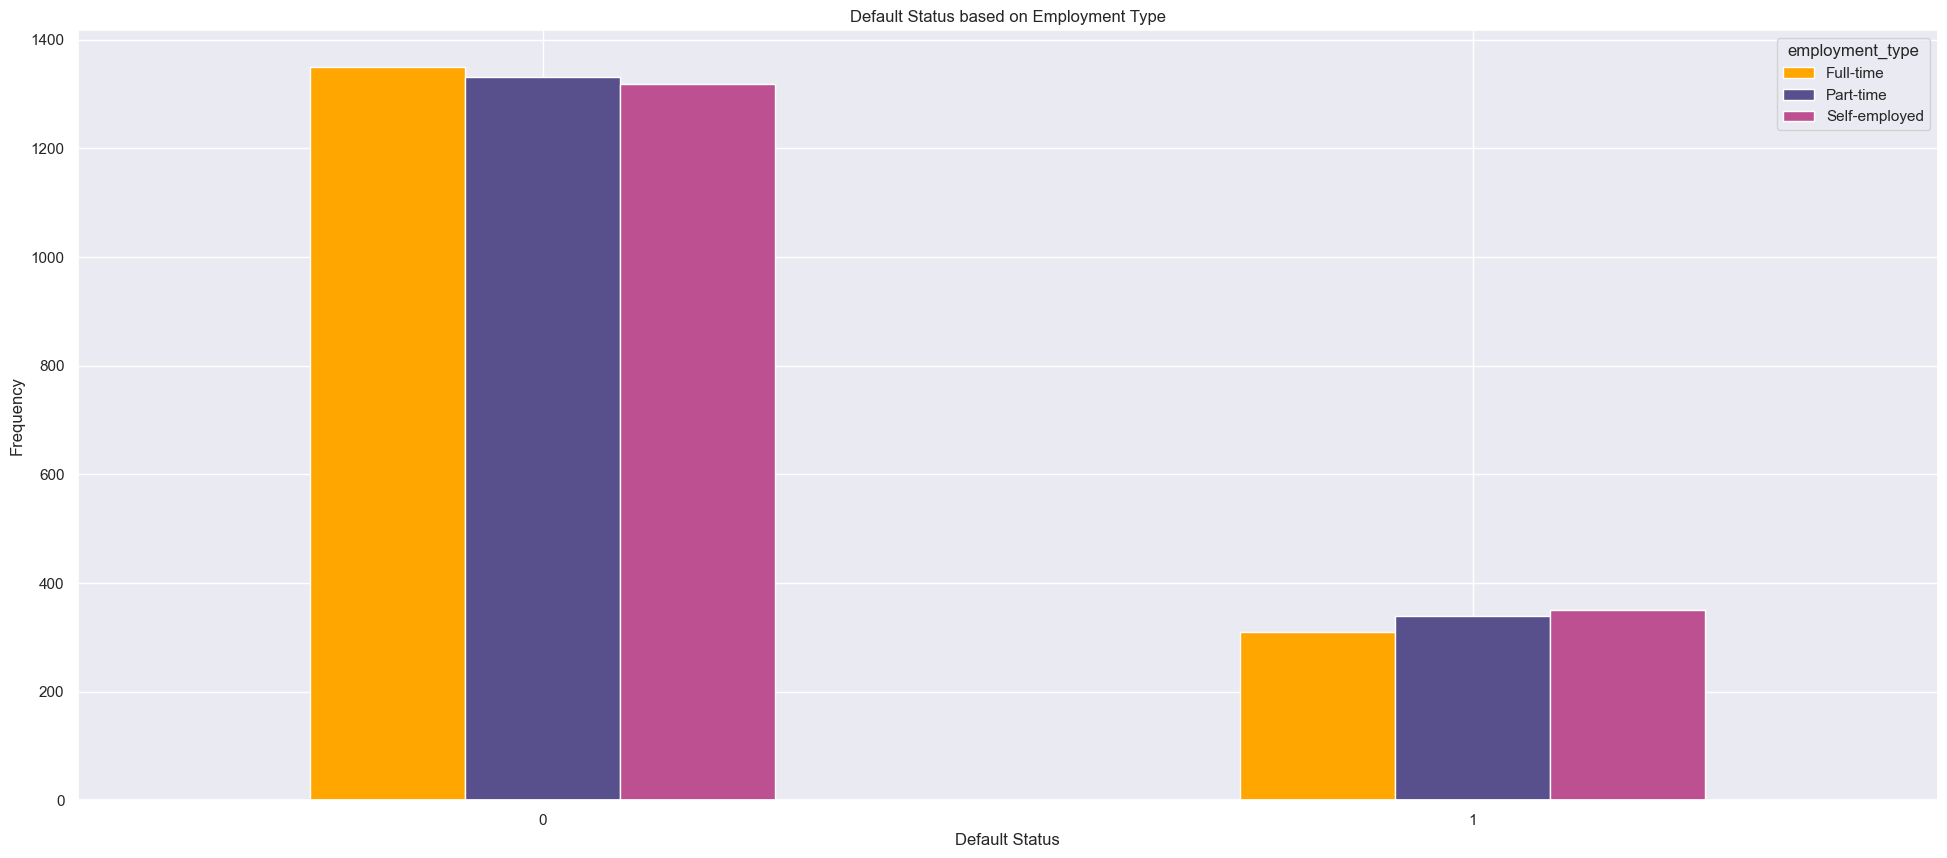

In [204]:
#Default Status based on Employment Type

pd.crosstab(loan.default_status,loan.employment_type).plot(kind="bar",figsize=(24,10),color=['#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Default Status based on Employment Type')
plt.xlabel('Default Status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='education_level', ylabel='count'>

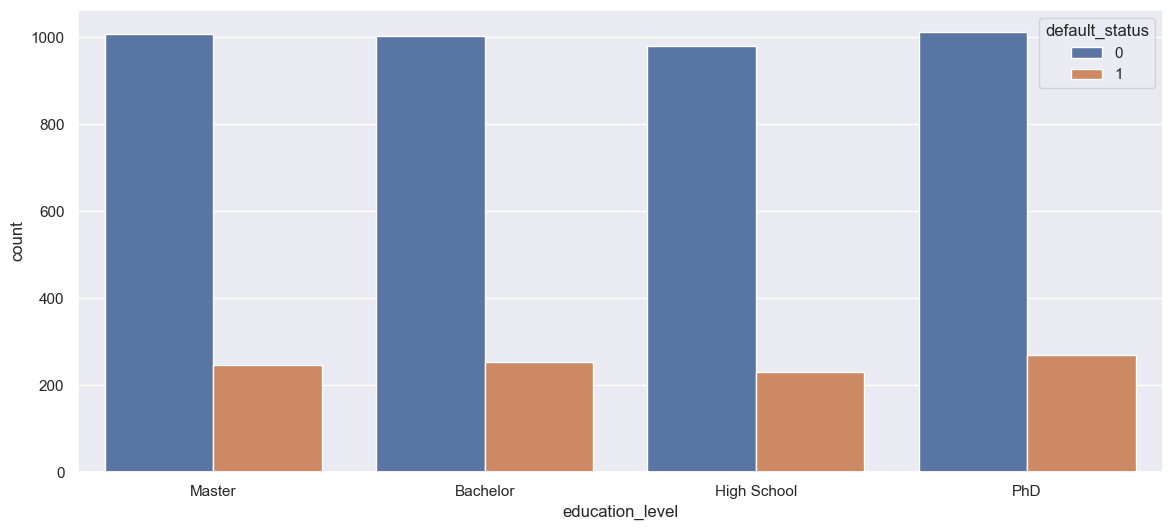

In [202]:
#Default Status based on Education Level

plt.figure(figsize=(14, 6))
sns.countplot( x='education_level', hue='default_status', data=loan )

<Axes: xlabel='default_status', ylabel='loan_term'>

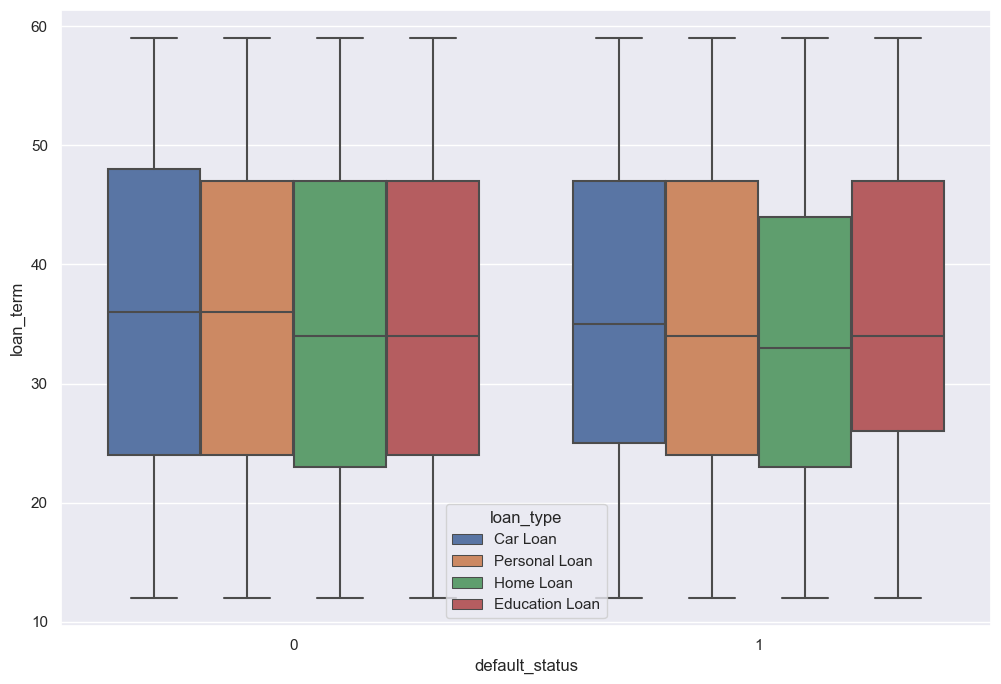

In [42]:
#Loan Term vs Default Status vs Income Level

fig, ax = plt.subplots( figsize = (12,8) )
sns.boxplot(x = "default_status", y = "loan_term", hue='loan_type', data = loan)

In [126]:
# Data Binning:
# Loan Amount will be divided into 18 categories each

bin_LoanAmount = [1055, 1999, 2999, 3999, 4999, 5999, 6999, 7999, 8999, 9999, 19999, 29999, 39999, 49999, 59999, 69999, 79999, 89999, 99989]
category_LoanAmount = ['1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000-20000', '20000-30000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000', '80000-90000', '>90000']
loan['loan_amount_binned'] = pd.cut(loan['loan_amount'], bins=bin_LoanAmount, labels=category_LoanAmount)
loan = loan.drop(['loan_amount'], axis = 1)

In [127]:
#Interest Rate will be catergorised into 11 catergory
          
bin_InterestRate = [3, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9, 12.9, 13.8]
category_InterestRate = ['3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '>13']
loan['interest_rate_binned'] = pd.cut(loan['interest_rate'], bins=bin_InterestRate, labels=category_InterestRate)
loan = loan.drop(['interest_rate'], axis = 1)

In [128]:
# Loan Term  will be divided into 5 categories each

bin_LoanTerm = [12, 19, 29, 39, 49, 59]
category_LoanTerm = ['10-20', '20-30', '30-40', '40-50', '>50']
loan['loan_term_binned'] = pd.cut(loan['loan_term'], bins=bin_LoanTerm, labels=category_LoanTerm)
loan = loan.drop(['loan_term'], axis = 1)

In [129]:
# Credit Score will be divided into 6 categories each

bin_CreditScore = [300, 399, 499, 599, 699, 799, 849]
category_CreditScore = ['300-400', '400-500', '500-600', '600-700', '700-800', '>800']
loan['credit_score_binned'] = pd.cut(loan['credit_score'], bins=bin_CreditScore, labels=category_CreditScore)
loan = loan.drop(['credit_score'], axis = 1)

In [130]:
# Data Binning on Dates:

# The four dates: Application/Approval/Disbursement/Due will not be using years as it is not predicting the future years,
# will be using Weeks(1-53), Days(1-31), Months (1-12) and DayOfWeek (0-6) instead

loan.drop(['application_date', 'application_date_year'], axis='columns', inplace=True)
          
bin_ApplicationWeek = [0, 9, 19, 29, 39, 49, 53]
category_ApplicationWeek = ['<10', '10-20', '20-30', '30-40', '40-50', '>50']
loan['application_date_week_binned'] = pd.cut(loan['application_date_week'], bins=bin_ApplicationWeek, labels=category_ApplicationWeek)
loan = loan.drop(['application_date_week'], axis = 1)

bin_ApplicationDay = [0, 9, 19, 29, 31]
category_ApplicationDay = ['<10', '10-20', '20-30', '>30']
loan['application_date_day_binned'] = pd.cut(loan['application_date_day'], bins=bin_ApplicationDay, labels=category_ApplicationDay)
loan = loan.drop(['application_date_day'], axis = 1)

bin_ApplicationMonth = [1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9, 12]
category_ApplicationMonth = ['<2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12']
loan['application_date_month_binned'] = pd.cut(loan['application_date_month'], bins=bin_ApplicationMonth, labels=category_ApplicationMonth)
loan = loan.drop(['application_date_month'], axis = 1)

bin_ApplicationDayOfWeek = [0, 1.9, 2.9, 3.9, 4.9, 5.9, 6]
category_ApplicationDayOfWeek = ['<1', '1-2', '2-3', '3-4', '4-5', '5-6']
loan['application_date_dayofweek_binned'] = pd.cut(loan['application_date_dayofweek'], bins=bin_ApplicationDayOfWeek, labels=category_ApplicationDayOfWeek)
loan = loan.drop(['application_date_dayofweek'], axis = 1)


In [131]:
loan.drop(['approval_date', 'approval_date_year'], axis='columns', inplace=True)
          
bin_ApprovalWeek = [0, 9, 19, 29, 39, 49, 53]
category_ApprovalWeek = ['<10', '10-20', '20-30', '30-40', '40-50', '>50']
loan['approval_date_week_binned'] = pd.cut(loan['approval_date_week'], bins=bin_ApprovalWeek, labels=category_ApprovalWeek)
loan = loan.drop(['approval_date_week'], axis = 1)

bin_ApprovalDay = [0, 9, 19, 29, 31]
category_ApprovalDay = ['<10', '10-20', '20-30', '>30']
loan['approval_date_day_binned'] = pd.cut(loan['approval_date_day'], bins=bin_ApprovalDay, labels=category_ApprovalDay)
loan = loan.drop(['approval_date_day'], axis = 1)

bin_ApprovalMonth = [1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9, 12]
category_ApprovalMonth = ['<2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12']
loan['approval_date_month_binned'] = pd.cut(loan['approval_date_month'], bins=bin_ApprovalMonth, labels=category_ApprovalMonth)
loan = loan.drop(['approval_date_month'], axis = 1)

bin_ApprovalDayOfWeek = [0, 1.9, 2.9, 3.9, 4.9, 5.9, 6]
category_ApprovalDayOfWeek = ['<1', '1-2', '2-3', '3-4', '4-5', '5-6']
loan['approval_date_dayofweek_binned'] = pd.cut(loan['approval_date_dayofweek'], bins=bin_ApprovalDayOfWeek, labels=category_ApprovalDayOfWeek)
loan = loan.drop(['approval_date_dayofweek'], axis = 1)

In [132]:
loan.drop(['disbursement_date', 'disbursement_date_year'], axis='columns', inplace=True)
          
bin_DisbursementWeek = [0, 9, 19, 29, 39, 49, 53]
category_DisbursementWeek = ['<10', '10-20', '20-30', '30-40', '40-50', '>50']
loan['disbursement_date_week_binned'] = pd.cut(loan['disbursement_date_week'], bins=bin_DisbursementWeek, labels=category_DisbursementWeek)
loan = loan.drop(['disbursement_date_week'], axis = 1)

bin_DisbursementDay = [0, 9, 19, 29, 31]
category_DisbursementDay = ['<10', '10-20', '20-30', '>30']
loan['disbursement_date_day_binned'] = pd.cut(loan['disbursement_date_day'], bins=bin_DisbursementDay, labels=category_DisbursementDay)
loan = loan.drop(['disbursement_date_day'], axis = 1)

bin_DisbursementMonth = [1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9, 12]
category_DisbursementMonth = ['<2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12']
loan['disbursement_date_month_binned'] = pd.cut(loan['disbursement_date_month'], bins=bin_DisbursementMonth, labels=category_DisbursementMonth)
loan = loan.drop(['disbursement_date_month'], axis = 1)

bin_DisbursementDayOfWeek = [0, 1.9, 2.9, 3.9, 4.9, 5.9, 6]
category_DisbursementDayOfWeek = ['<1', '1-2', '2-3', '3-4', '4-5', '5-6']
loan['disbursement_date_dayofweek_binned'] = pd.cut(loan['disbursement_date_dayofweek'], bins=bin_DisbursementDayOfWeek, labels=category_DisbursementDayOfWeek)
loan = loan.drop(['disbursement_date_dayofweek'], axis = 1)

In [133]:
loan.drop(['due_date', 'due_date_year'], axis='columns', inplace=True)
          
bin_DueWeek = [0, 9, 19, 29, 39, 49, 53]
category_DueWeek = ['<10', '10-20', '20-30', '30-40', '40-50', '>50']
loan['due_date_week_binned'] = pd.cut(loan['due_date_week'], bins=bin_DueWeek, labels=category_DueWeek)
loan = loan.drop(['due_date_week'], axis = 1)

bin_DueDay = [0, 9, 19, 29, 31]
category_DueDay = ['<10', '10-20', '20-30', '>30']
loan['due_date_day_binned'] = pd.cut(loan['due_date_day'], bins=bin_DueDay, labels=category_DueDay)
loan = loan.drop(['due_date_day'], axis = 1)

bin_DueMonth = [1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9, 12]
category_DueMonth = ['<2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12']
loan['due_date_month_binned'] = pd.cut(loan['due_date_month'], bins=bin_DueMonth, labels=category_DueMonth)
loan = loan.drop(['due_date_month'], axis = 1)

bin_DueDayOfWeek = [0, 1.9, 2.9, 3.9, 4.9, 5.9, 6]
category_DueDayOfWeek = ['<1', '1-2', '2-3', '3-4', '4-5', '5-6']
loan['due_date_dayofweek_binned'] = pd.cut(loan['due_date_dayofweek'], bins=bin_DueDayOfWeek, labels=category_DueDayOfWeek)
loan = loan.drop(['due_date_dayofweek'], axis = 1)

In [152]:
#Since there is no sign of major skewness seen in all numericle variables, 
#while there are categorical variables difference seen in the distribution,
#need to encode the categorical variables into integer format so that machine learning model can read it

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [153]:
#Feature Engineering (FE)
#The customer_id and loan_id will apply on label encoder before applying it on onehot encoder as it takes only numerical categorical values.

label_encoder = LabelEncoder() 

for col in ['customer_id', 'loan_id', 'gender']: loan[col] = label_encoder.fit_transform( loan[col] )

In [154]:
#Feature Engineering (FE) 
#The FE method that used is one-hot encoding, which is transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction.

onehot_encoder = OneHotEncoder(sparse = False)

#for col in ['customer_id', 'loan_id', 'loan_type', 'employment_type', 'income_level', 'marital_status', 'education_level', 'gender', 'application_date_dayofweek', 'approval_date_dayofweek', 'disbursement_date_dayofweek', 'due_date_dayofweek']: loan[col] = onehot_encoder.fit_transform( loan[col] .values.reshape(-1, 1))
for col in ['customer_id', 'loan_id', 'loan_amount_binned', 'interest_rate_binned', 'loan_type', 'employment_type', 'income_level', 'marital_status', 'education_level', 'loan_term_binned', 'credit_score_binned', 'application_date_month_binned', 'application_date_week_binned', 'application_date_day_binned', 'application_date_dayofweek_binned', 'approval_date_month_binned', 'approval_date_week_binned', 'approval_date_day_binned', 'approval_date_dayofweek_binned', 'disbursement_date_month_binned', 'disbursement_date_week_binned', 'disbursement_date_day_binned', 'disbursement_date_dayofweek_binned', 'due_date_month_binned', 'due_date_week_binned', 'due_date_day_binned', 'due_date_dayofweek_binned']: loan[col] = onehot_encoder.fit_transform( loan[col] .values.reshape(-1, 1))

In [155]:
# After the Feature engineering part is complete, train and test-run trial on the dummies for all the variables  
# Splitting the data into train and test splits
# The dataset will be split into 80% training and 20% testing

X = loan.drop(['default_status'], axis=1)
y = loan['default_status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [156]:
X_train.head(30)

,customer_id,loan_id,loan_type,employment_type,income_level,gender,marital_status,education_level,loan_amount_binned,interest_rate_binned,...,approval_date_month_binned,approval_date_dayofweek_binned,disbursement_date_week_binned,disbursement_date_day_binned,disbursement_date_month_binned,disbursement_date_dayofweek_binned,due_date_week_binned,due_date_day_binned,due_date_month_binned,due_date_dayofweek_binned
2913,1.0,1.0,1.0,1.0,0.0,0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3275,1.0,1.0,0.0,1.0,1.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
775,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
217,1.0,1.0,0.0,1.0,0.0,0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1245,1.0,1.0,1.0,1.0,1.0,1,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4316,1.0,1.0,1.0,0.0,0.0,1,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4619,1.0,1.0,0.0,1.0,1.0,0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1363,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
630,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3572,1.0,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


In [157]:
X_test.head(30)

,customer_id,loan_id,loan_type,employment_type,income_level,gender,marital_status,education_level,loan_amount_binned,interest_rate_binned,...,approval_date_month_binned,approval_date_dayofweek_binned,disbursement_date_week_binned,disbursement_date_day_binned,disbursement_date_month_binned,disbursement_date_dayofweek_binned,due_date_week_binned,due_date_day_binned,due_date_month_binned,due_date_dayofweek_binned
398,1.0,1.0,1.0,0.0,1.0,0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3833,1.0,1.0,0.0,0.0,1.0,0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4836,1.0,1.0,1.0,1.0,0.0,0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
4572,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
636,1.0,1.0,0.0,0.0,1.0,0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2545,1.0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
1161,1.0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2230,1.0,1.0,1.0,0.0,0.0,1,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
148,1.0,1.0,0.0,1.0,1.0,1,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2530,1.0,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


In [158]:
#SMOTE Techniques
#Since the number of 'Non-Defaulters' is more than 'Defaulters', oversampling is carried out to avoid overfitting.
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [159]:
#Using differents methods of Machine Learning Models and predictions :
#Logistic Regression

from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.53      0.65       820
           1       0.18      0.47      0.26       180

    accuracy                           0.52      1000
   macro avg       0.50      0.50      0.46      1000
weighted avg       0.71      0.52      0.58      1000

[[438 382]
 [ 95  85]]
Logistic Regression accuracy is: 52.30%


In [160]:
#K-Neigbors

from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))


              precision    recall  f1-score   support

           0       0.81      0.51      0.63       820
           1       0.17      0.47      0.25       180

    accuracy                           0.50      1000
   macro avg       0.49      0.49      0.44      1000
weighted avg       0.70      0.50      0.56      1000

[[419 401]
 [ 96  84]]
K Neighbours accuracy is: 50.30%


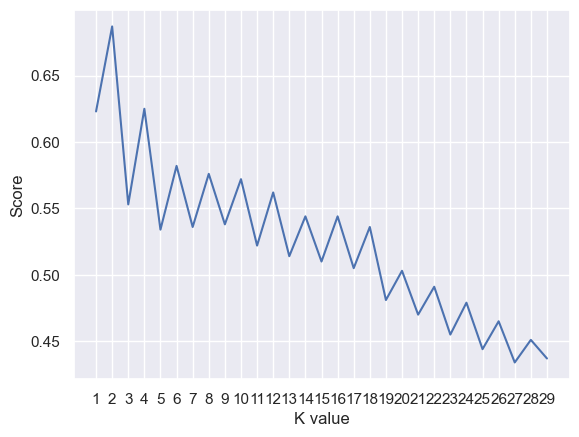

KNN Acc Max 68.70%


In [161]:
#KNN Max

scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

In [162]:
#Support Vector Machine (SVM)

from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.84      0.37      0.52       820
           1       0.19      0.67      0.30       180

    accuracy                           0.43      1000
   macro avg       0.51      0.52      0.41      1000
weighted avg       0.72      0.43      0.48      1000

[[305 515]
 [ 59 121]]
SVC accuracy is: 42.60%


In [163]:
#Naive Bayes Method :
#Categorical NB

from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.83      0.63      0.71       820
           1       0.20      0.43      0.28       180

    accuracy                           0.59      1000
   macro avg       0.52      0.53      0.50      1000
weighted avg       0.72      0.59      0.64      1000

[[513 307]
 [102  78]]
Naive Bayes accuracy is: 59.10%


In [164]:
#Gaussian NB

from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.80      0.31      0.45       820
           1       0.17      0.65      0.27       180

    accuracy                           0.37      1000
   macro avg       0.49      0.48      0.36      1000
weighted avg       0.69      0.37      0.42      1000

[[254 566]
 [ 63 117]]
Gaussian Naive Bayes accuracy is: 37.10%


In [165]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=30)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       820
           1       0.20      0.07      0.11       180

    accuracy                           0.78      1000
   macro avg       0.51      0.50      0.49      1000
weighted avg       0.71      0.78      0.74      1000

[[768  52]
 [167  13]]
Decision Tree accuracy is: 78.10%


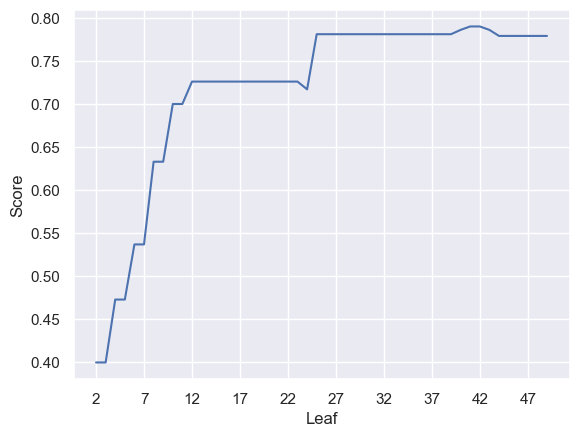

DT Acc Max 79.00%


In [166]:
#Decision Tree Max

scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

In [167]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=150)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       820
           1       0.34      0.07      0.11       180

    accuracy                           0.81      1000
   macro avg       0.58      0.52      0.50      1000
weighted avg       0.74      0.81      0.75      1000

[[797  23]
 [168  12]]
Random Forest accuracy is: 80.90%


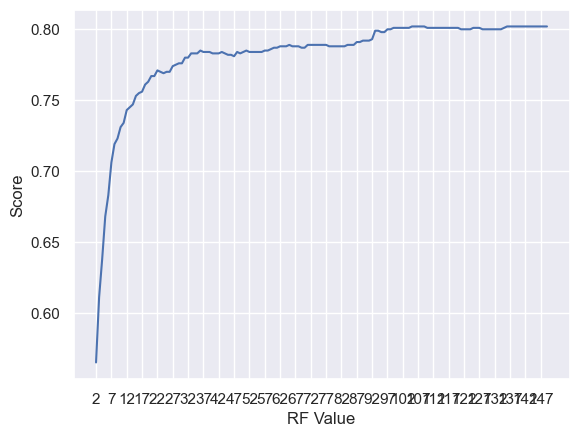

RF Acc Max 80.20%


In [168]:
# Random Forest Max

scoreListRF = []
for i in range(2,150):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,150), scoreListRF)
plt.xticks(np.arange(2,150,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

In [169]:
# Model Comparison

compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, KNAccMax*100, SVCAcc*100, NBAcc1*100, NBAcc2*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
8,Random Forest,80.9
9,Random Forest Max,80.2
7,Decision Tree Max,79.0
6,Decision Tree,78.1
2,K Neighbors Max,68.7
4,Categorical NB,59.1
0,Logistic Regression,52.3
1,K Neighbors,50.3
3,SVM,42.6
5,Gaussian NB,37.1


Conclusion : 

From the results, it can be seen that Random Forest has the highest accuracy of 80% as compare to the rest of ML models in predicting classification of default status, for the 'Non-Defaulters' on precision, recall and F1-score gives a high score of 83%,97% and 89% and the 'Defaulters' score was 34%,7% and 11% which is lower but able to predict the number of defaulters which is closely comparable to the actual datasets.

The Decision Tree Classifier has an accuracy above 70% but will select Random Forest as a better ML classifier as the confusion matrix has a better result, and also the precision, recall and F1-score has the highest score.

Data preparartion like Data Minning need to be specifically done on on numerical and categorical variables which is very important so that ML algorthim will gives a more accuracy in the predictive algorithm techniques used. 
In the case of categorical features, we need to perform encoding like onehot encoding so that the ML algorithm can process them more accurately.

Predicting Loan Default is highly dependent on the demographics of the people, Self-employed/Part-timers with lower income and higher education level are more likely to default on loans.Majority are males.

Recommendations:

-Using a split dataset of training size 80% and test size 20% will have a better accuracy 

-The max leaf node value of the Random Forest Classifier has to input with 150 RF value as there is a gradual increase
of the graph chart


***Below work are for my own reference which has been done during the project preparation phase***

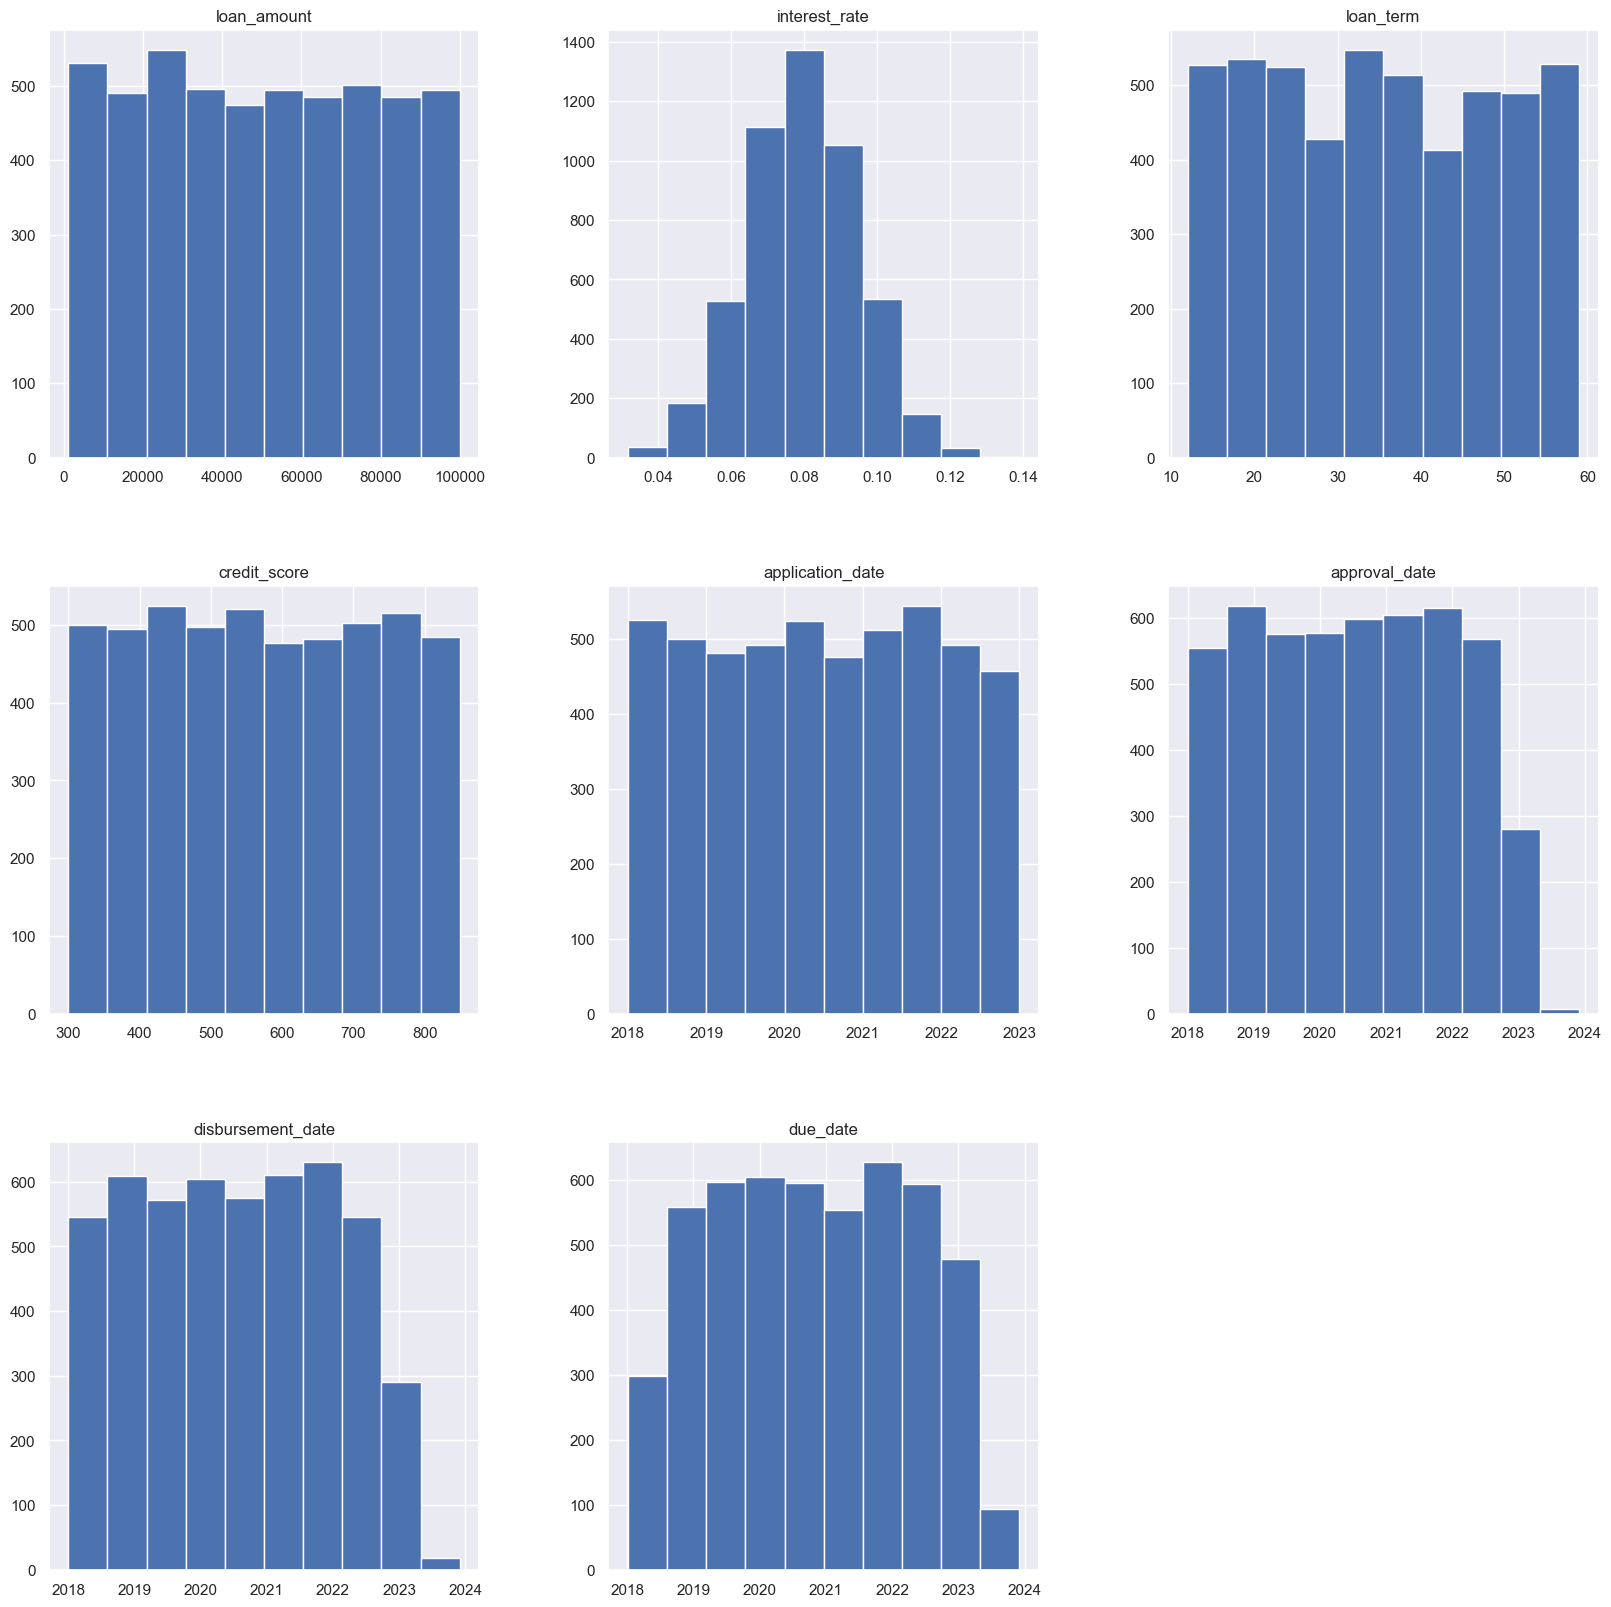

In [154]:
#To check the data distribution
loan.hist(figsize = (20, 20))
plt.show()

In [55]:
#To check the number of default status #####
#There is 999 defaulted 
loan['default_status'].value_counts()

0    4001
1     999
Name: default_status, dtype: int64

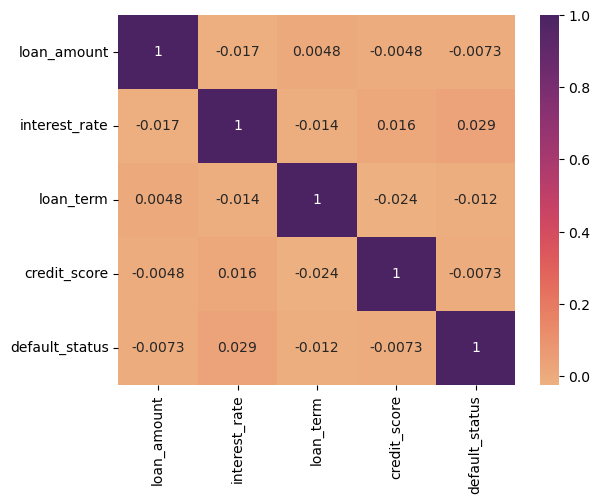

In [59]:
# Using Correlation Analysis with seaborn heatmap to see any relationship between all the numerical column 
correl = loan.corr()

# From seaborn heatmap showing very low correlation bnetween all the numerical column 
sns.heatmap(correl, cmap = "flare", annot = True)
plt.show()

In [108]:
#To see the corelation values from highest to lowest and to drop the duplcates from left diagional to right bottom

loan.corr().unstack().sort_values(ascending = False).drop_duplicates()

loan_amount     loan_amount       1.000000
default_status  interest_rate     0.028963
interest_rate   credit_score      0.016064
loan_term       loan_amount       0.004763
credit_score    loan_amount      -0.004780
default_status  loan_amount      -0.007309
credit_score    default_status   -0.007346
default_status  loan_term        -0.012358
loan_term       interest_rate    -0.014311
interest_rate   loan_amount      -0.017317
loan_term       credit_score     -0.023735
dtype: float64

In [109]:
#Further arrange from highest to lowest correlation with respect to default status
#The rnking are 1) interest rate, 2) loan amount , 3) credit score and 4) loan term

loan.corr().unstack().sort_values(ascending = False)['default_status']

default_status    1.000000
interest_rate     0.028963
loan_amount      -0.007309
credit_score     -0.007346
loan_term        -0.012358
dtype: float64

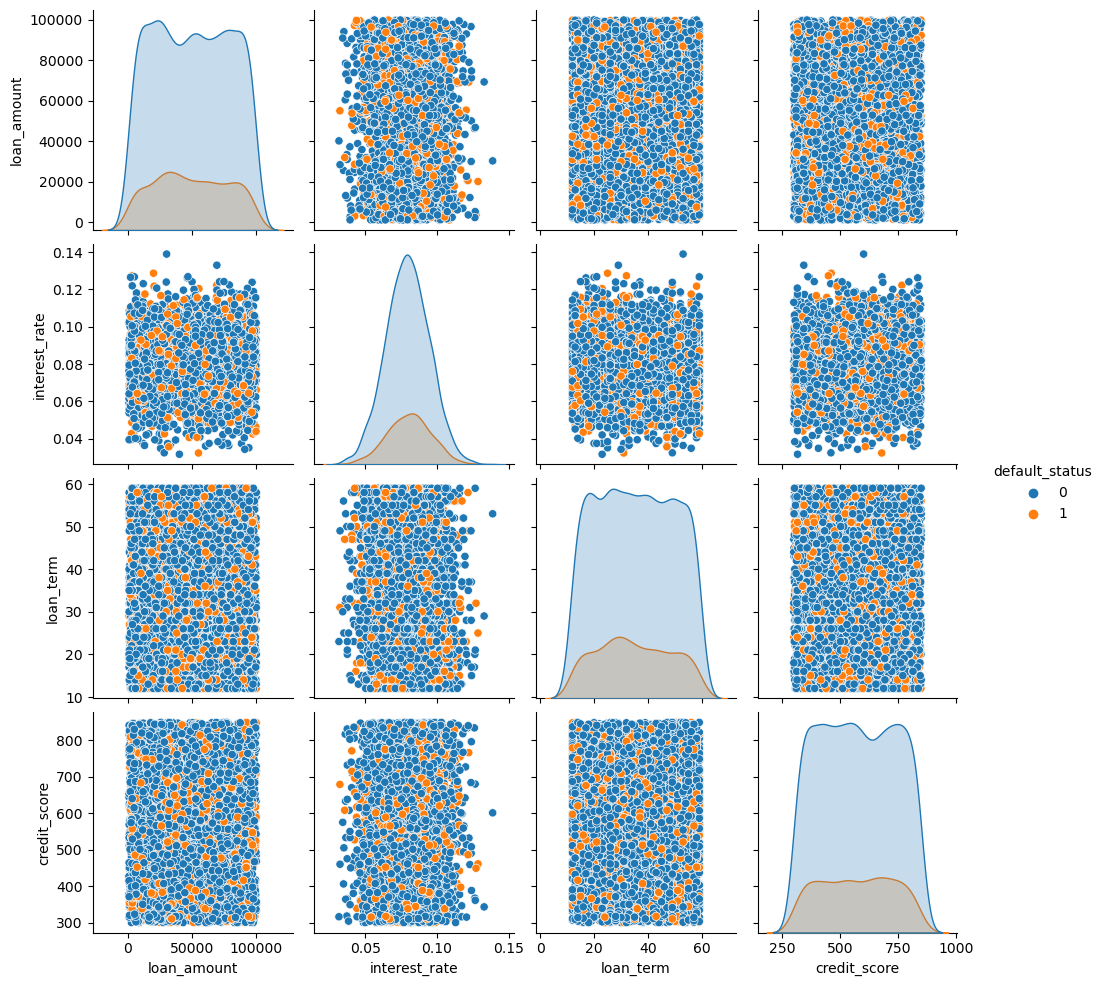

In [110]:
#let Create a pair plot of the columns 
sns.pairplot(loan, hue = 'default_status')       # graph also  tell us about the the realationship between the two columns 

Divorced    1682
Married     1681
Single      1637
Name: marital_status, dtype: int64


<Axes: ylabel='marital_status'>

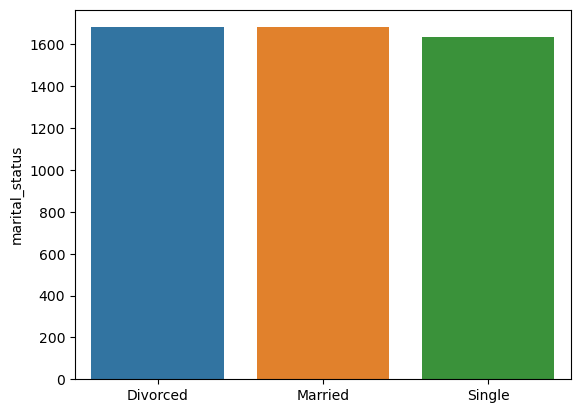

In [80]:
## To analyse on the categorical feature:
#To check the count of single vs married vs divorced
#Married and Divorced almost the same total count 

MaritalStatus = loan[loan['marital_status'].str.contains('')]
print(MaritalStatus['marital_status'].value_counts())
sns.barplot(x = MaritalStatus['marital_status'].value_counts().index, y = MaritalStatus['marital_status'].value_counts())

Part-time        1672
Self-employed    1669
Full-time        1659
Name: employment_type, dtype: int64


<Axes: ylabel='employment_type'>

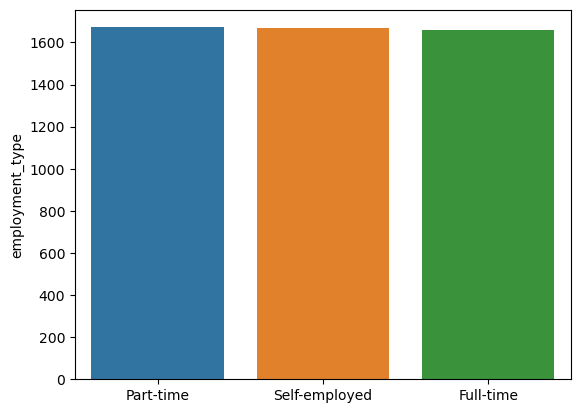

In [81]:
#To check the count of Employment Type
#Part time and Self-Employed has the closest total count 

EmploymentType = loan[loan['employment_type'].str.contains('')]
print(EmploymentType['employment_type'].value_counts())
sns.barplot(x = EmploymentType['employment_type'].value_counts().index, y = EmploymentType['employment_type'].value_counts())

Low       1713
Medium    1672
High      1615
Name: income_level, dtype: int64


<Axes: ylabel='income_level'>

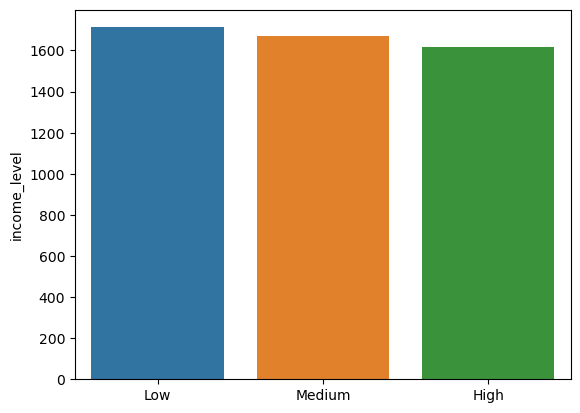

In [82]:
#To check the count of Income Level
#Low Income Level has the highest total count 

IncomeLevel = loan[loan['income_level'].str.contains('')]
print(IncomeLevel['income_level'].value_counts())
sns.barplot(x = IncomeLevel['income_level'].value_counts().index, y = IncomeLevel['income_level'].value_counts())

PhD            1282
Master         1254
Bachelor       1254
High School    1210
Name: education_level, dtype: int64


<Axes: ylabel='education_level'>

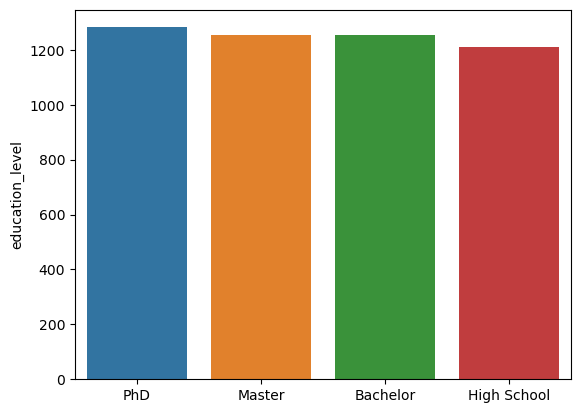

In [85]:
#To check the count of Education Level
#PhD has the highest total count 

EducationLevel = loan[loan['education_level'].str.contains('')]
print(EducationLevel['education_level'].value_counts())
sns.barplot(x = EducationLevel['education_level'].value_counts().index, y = EducationLevel['education_level'].value_counts())

<Axes: xlabel='default_status', ylabel='loan_amount'>

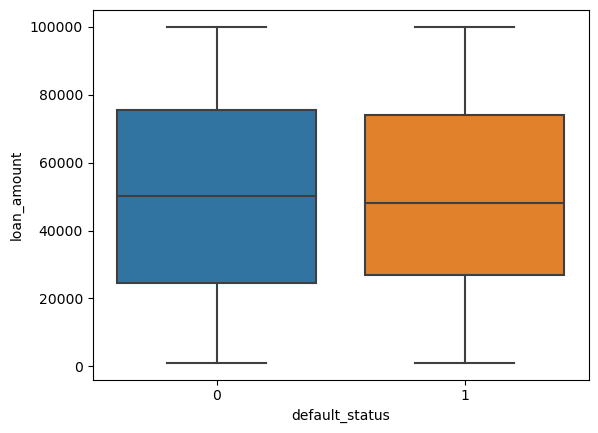

In [93]:
#To see for any abnormality between the different data features with default status.

sns.boxplot(x ="default_status", y="loan_amount" , data = loan)

<Axes: xlabel='default_status', ylabel='interest_rate'>

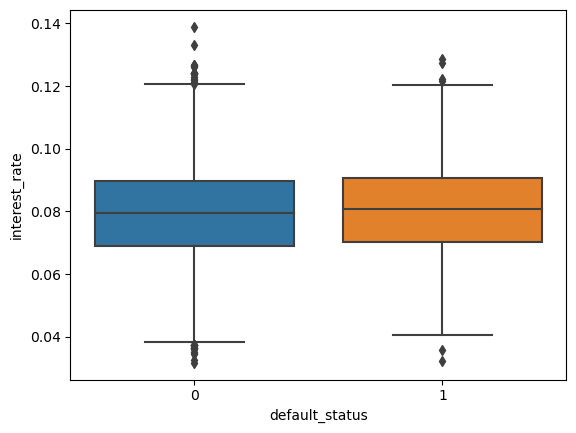

In [94]:
#To see the relationship between interest rate with default status.
sns.boxplot(x ="default_status", y="interest_rate" , data = loan)

<Axes: xlabel='default_status', ylabel='loan_term'>

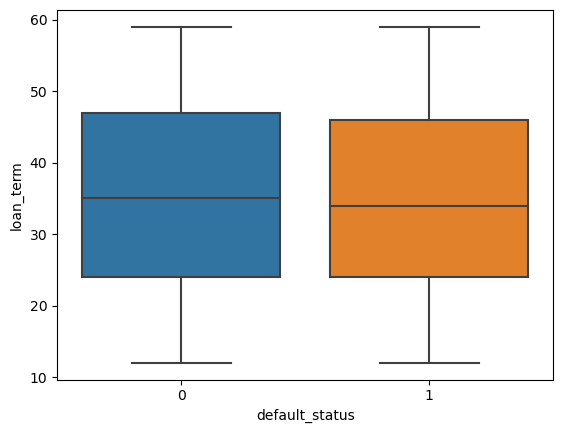

In [95]:
#To see the relationship between loan term with default status.
sns.boxplot(x ="default_status", y="loan_term" , data = loan)

<Axes: xlabel='default_status', ylabel='credit_score'>

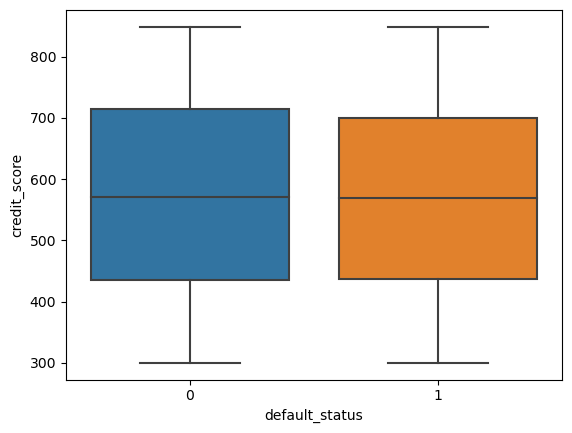

In [96]:
#To see the relationship between credit score with default status.
sns.boxplot(x ="default_status", y="credit_score" , data = loan)

<Axes: xlabel='income_level', ylabel='count'>

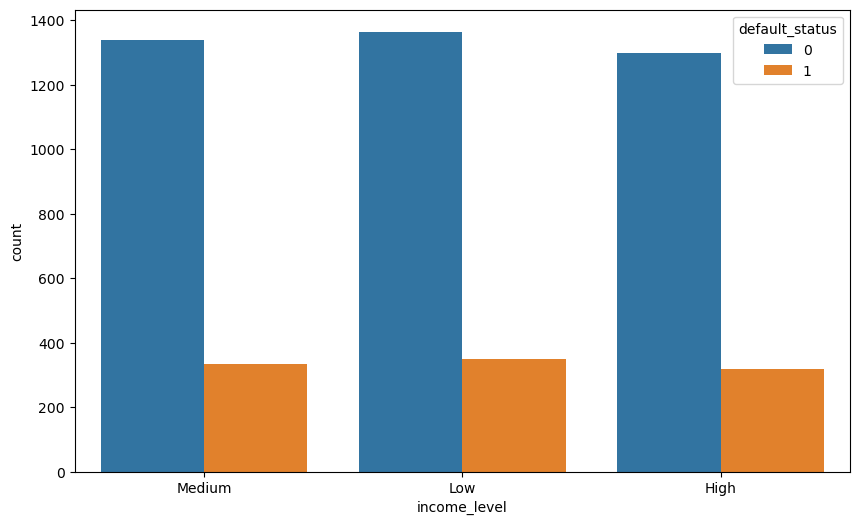

In [103]:
plt.figure(figsize=(10, 6))
sns.countplot( x='income_level', hue='default_status', data=loan )

<Axes: xlabel='employment_type', ylabel='count'>

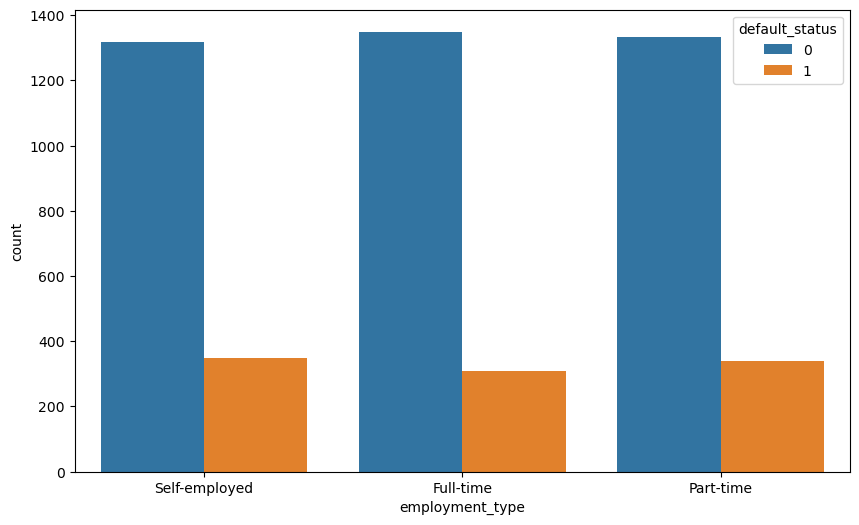

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot( x='employment_type', hue='default_status', data=loan )

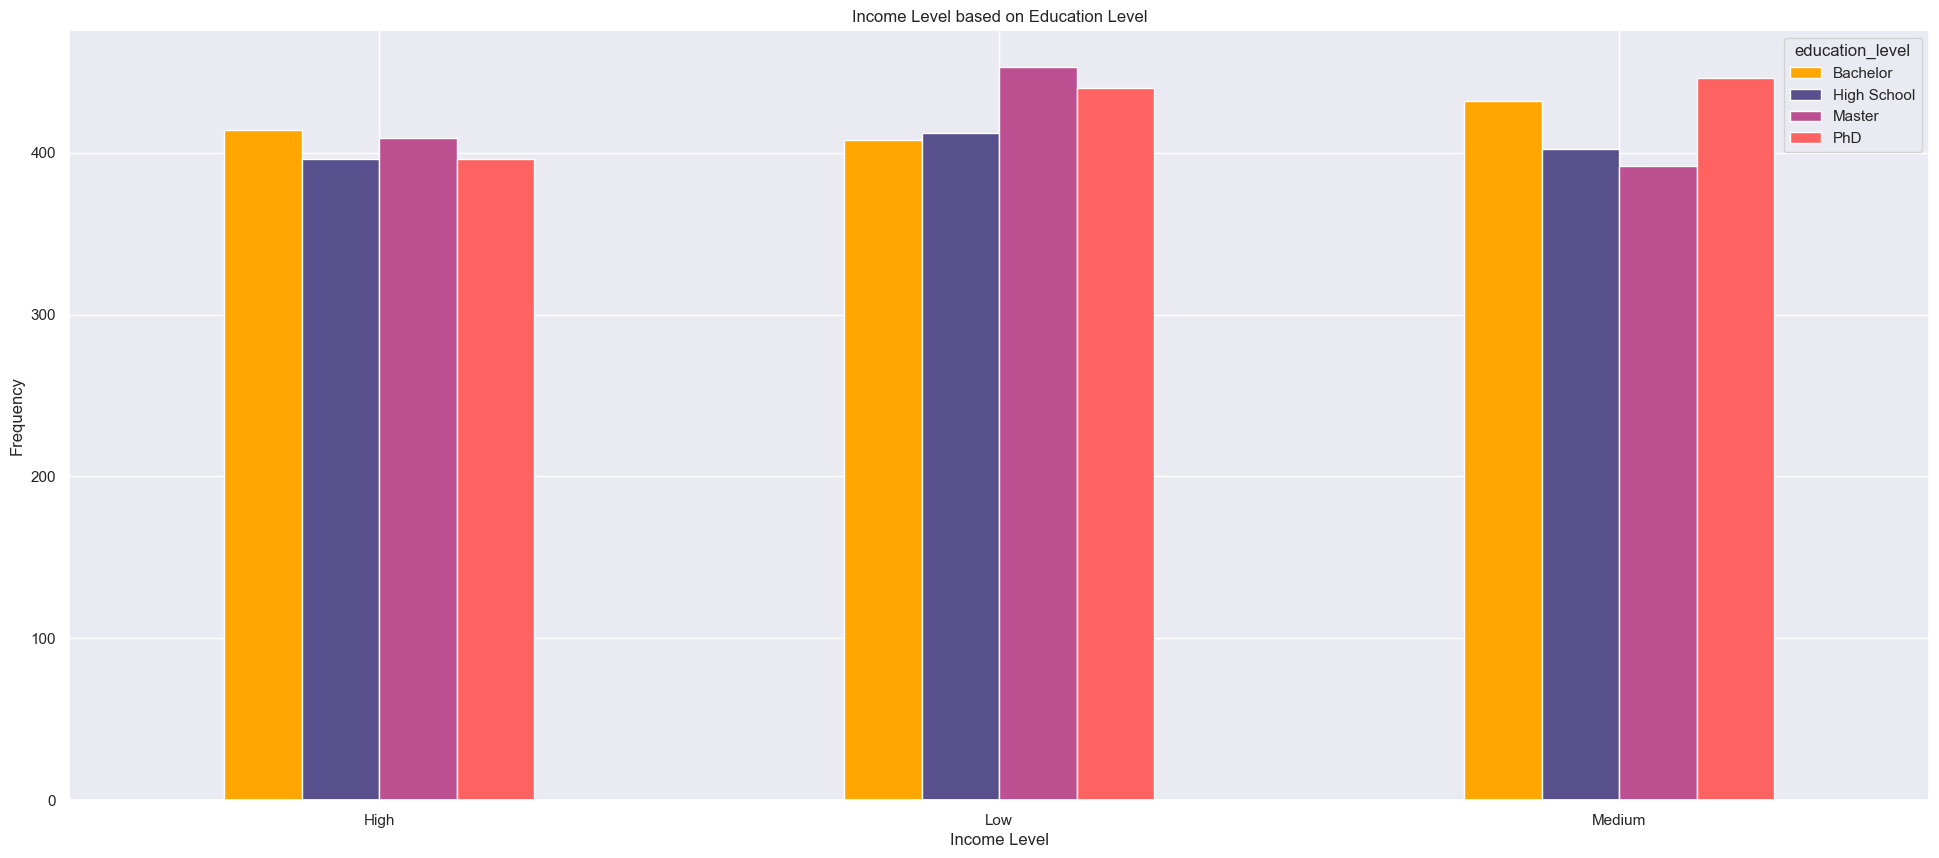

In [199]:
#Income Level based on Education Level

pd.crosstab(loan.income_level,loan.education_level).plot(kind="bar",figsize=(24,10),color=['#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Income Level based on Education Level')
plt.xlabel('Income Level')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.xlabel('Income Level')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

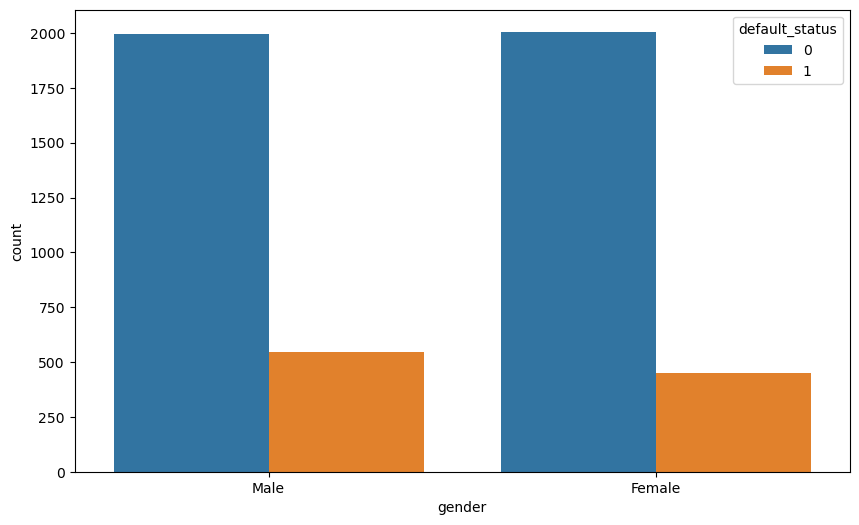

In [107]:
plt.figure(figsize=(10, 6))
sns.countplot( x='gender', hue='default_status', data=loan )